In [4]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
kpi = pd.read_excel('siste_rente_kpi.xlsx')

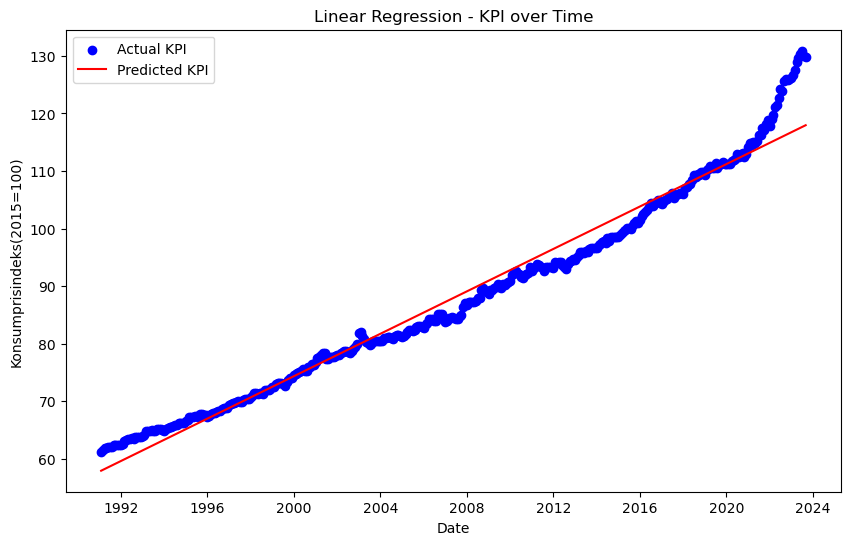

In [6]:
# Convert 'Dato' to datetime object
kpi['Dato'] = pd.to_datetime(kpi['Dato'])

kpi['Dato_numeric'] = (kpi['Dato'] - kpi['Dato'].min()).dt.days

X_kpi = kpi[['Dato_numeric']]
y_kpi = kpi['Konsumprisindeks(2015=100)']

model_kpi_r = LinearRegression()
model_kpi_r.fit(X_kpi, y_kpi)

predictions_kpi = model_kpi_r.predict(X_kpi)

# Extract the first Y value and corresponding date
start_date = kpi['Dato'].min()
start_y_value = y_kpi.iloc[0]

# Calculate the slope for a 2.5% yearly increase
slope =  0.025  # 2.5% as a decimal

# Calculate the intercept based on the start point
intercept = start_y_value - slope * (kpi['Dato'] - start_date).dt.days.iloc[0]

plt.figure(figsize=(10, 6))

# Plotting the data
plt.scatter(kpi['Dato'], y_kpi, color='blue', label='Actual KPI')

# Plotting the regression line
plt.plot(kpi['Dato'], predictions_kpi, color='red', label='Predicted KPI')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Konsumprisindeks(2015=100)')
plt.title('Linear Regression - KPI over Time')
plt.legend()
plt.show()

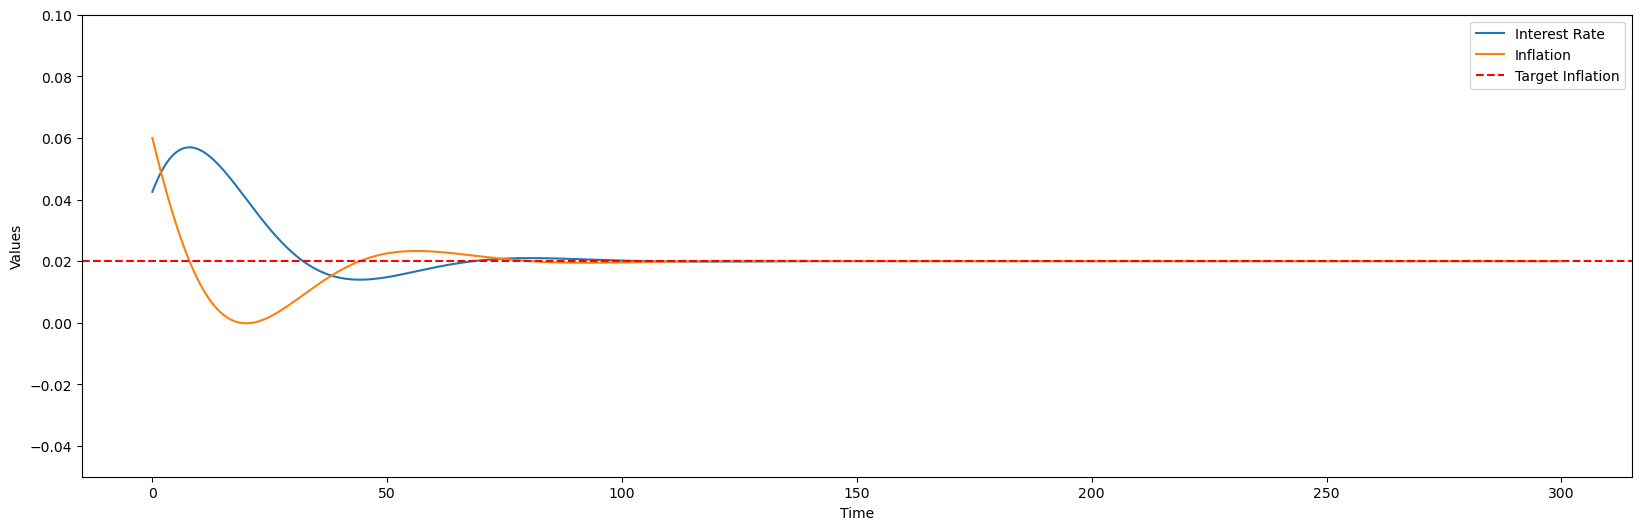

In [20]:
# Define the coupled ODE system with bounds and damping
def model(y, t, k, T, damping):
    I, inflation = y
    dI_dt = k * (inflation - T)
    dinflation_dt = -k * (I - T) - damping * (inflation - T)  # Damping term
    return [np.clip(dI_dt, -0.05, 0.10), np.clip(dinflation_dt, -0.05, 0.10)]

# Initial conditions
initial_interest_rate = 0.0425
initial_inflation = 0.06
target_inflation = 0.02
k = 0.1  # You may need to adjust this parameter
damping = 0.1  # Damping coefficient, adjust as needed

# Time points
t = np.linspace(0, 12*25, 10000)

# Solve the coupled ODEs
solution = odeint(model, [initial_interest_rate, initial_inflation], t, args=(k, target_inflation, damping))

# Increase the size of the plot
plt.figure(figsize=(20, 6))

# Plot the results
plt.plot(t, solution[:, 0], label='Interest Rate')
plt.plot(t, solution[:, 1], label='Inflation')
plt.axhline(y=target_inflation, color='r', linestyle='--', label='Target Inflation')
plt.xlabel('Time')
plt.ylabel('Values')
plt.ylim([-0.05, 0.10])  # Set y-axis limits
plt.legend()
plt.show()